In [1]:
from ultralytics import YOLO
import cv2

import torch

import glob

from tqdm import tqdm

import os

import json

In [4]:
lst1 = [1, 2, 3, 4, 5]
lst2 = [1, 2, 3, 5, 6]

new_items = set(lst2) - set(lst1)
removed_items = set(lst1) - set(lst2)
new_items, removed_items

({6}, {4})

In [8]:
d1 = {1:1, 2:2}
d1.update({})
d1

{1: 1, 2: 2}

# Тест одного видео

In [2]:
model = YOLO('yolov8x.pt')

# Open the video file
#video_path = r"C:\Users\admin\python_programming\DATA\AVABOS\test_bboxes\4LUoqxnyxlE(+)_._0.066-40.066.mp4"
video_path = r'I:\AVABOS\4LUoqxnyxlE(+)+ - test\4LUoqxnyxlE(+).mp4'
cap = cv2.VideoCapture(video_path)

#results_log = []
for i in tqdm(range(10)):
    success, frame = cap.read()
    if not success:
        break

    results = model.track(frame, persist=True, verbose=False)
    #results_log.append(results[0])

cap.release()

100%|██████████| 131M/131M [00:11<00:00, 11.7MB/s] 
100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


In [9]:
model.predictor#.trackers[0]

In [3]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_check_is_pytorch_model',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_hub_session',
 '_get_name',
 '_is_full_backward_hook',
 '_load',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 

In [37]:
name2class_id = {val: key for key, val in model.names.items()}
name2class_id

{'person': 0,
 'bicycle': 1,
 'car': 2,
 'motorcycle': 3,
 'airplane': 4,
 'bus': 5,
 'train': 6,
 'truck': 7,
 'boat': 8,
 'traffic light': 9,
 'fire hydrant': 10,
 'stop sign': 11,
 'parking meter': 12,
 'bench': 13,
 'bird': 14,
 'cat': 15,
 'dog': 16,
 'horse': 17,
 'sheep': 18,
 'cow': 19,
 'elephant': 20,
 'bear': 21,
 'zebra': 22,
 'giraffe': 23,
 'backpack': 24,
 'umbrella': 25,
 'handbag': 26,
 'tie': 27,
 'suitcase': 28,
 'frisbee': 29,
 'skis': 30,
 'snowboard': 31,
 'sports ball': 32,
 'kite': 33,
 'baseball bat': 34,
 'baseball glove': 35,
 'skateboard': 36,
 'surfboard': 37,
 'tennis racket': 38,
 'bottle': 39,
 'wine glass': 40,
 'cup': 41,
 'fork': 42,
 'knife': 43,
 'spoon': 44,
 'bowl': 45,
 'banana': 46,
 'apple': 47,
 'sandwich': 48,
 'orange': 49,
 'broccoli': 50,
 'carrot': 51,
 'hot dog': 52,
 'pizza': 53,
 'donut': 54,
 'cake': 55,
 'chair': 56,
 'couch': 57,
 'potted plant': 58,
 'bed': 59,
 'dining table': 60,
 'toilet': 61,
 'tv': 62,
 'laptop': 63,
 'mouse':

In [41]:
bboxes = results[0].boxes.xyxy.long().numpy()
bboxes

array([[   0,  152,  406,  699],
       [ 615,  247,  999,  704],
       [ 329,  184,  617,  705],
       [ 948,  306, 1279,  711],
       [ 153,  639,  257,  719],
       [ 497,  107,  665,  480],
       [ 987,  271, 1146,  599],
       [ 647,  123,  778,  533],
       [ 936,   92, 1122,  337],
       [ 736,  126,  872,  442],
       [ 124,  605,  218,  709],
       [ 358,  558,  488,  704],
       [ 880,  291, 1053,  523],
       [  42,  680,  142,  719]], dtype=int64)

In [61]:
results[0].orig_img.shape[:-1]

(720, 1280)

In [59]:
model.embed(frame)[0].shape

torch.Size([640])

In [45]:
bboxes = results[0].boxes.xyxy.long().numpy()
ids = results[0].boxes.id.long().numpy()
target_classes_filter = results[0].boxes.cls==name2class_id['person']
bboxes = bboxes[target_classes_filter]
ids = ids[target_classes_filter]
len(ids), len(bboxes)

(10, 10)

In [50]:
x0,y0,x1,y1 = bboxes[0]
x0,y0,x1,y1

(0, 152, 406, 699)

In [4]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_check_is_pytorch_model',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_hub_session',
 '_get_name',
 '_is_full_backward_hook',
 '_load',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 

In [6]:
bboxes_classes = results[0].boxes.cls
bboxes_ids = results[0].boxes.id
person_indices = bboxes_ids[bboxes_classes==0]
person_indices

tensor([43., 47., 50., 51.])

In [5]:
bboxes_ids[bboxes_classes==0]

tensor([43., 47., 50., 51.])

# Вычисление распределения количества индексов, сгенерированных автоматическим трекером

In [ ]:
def compute_id_num(path_to_vid):
    pass

In [21]:
paths_to_vids = glob.glob(r'I:\AVABOS\new_projects2\*\cut\*.mp4')
log_dict = {}
for path_to_vid in tqdm(paths_to_vids):
    model = YOLO('yolov8n.pt')
    cap = cv2.VideoCapture(path_to_vid)
    vid_name = os.path.split(path_to_vid)[-1]
    results_log = []
    while True:
        success, frame = cap.read()
        if not success:
            break

        results = model.track(frame, persist=True, verbose=False)
        bboxes_classes = results[0].boxes.cls
        bboxes_ids = results[0].boxes.id
        try:
            person_indices = bboxes_ids[bboxes_classes==0]
            person_indices = person_indices.long().tolist()
        except:
            person_indices = []
        results_log.append(person_indices)

    log_dict[vid_name] = results_log
    cap.release()

with open('persons_ids_log.json', 'w', encoding='utf-8') as fd:
    json.dump(log_dict, fd, indent=4)
   

  0%|          | 0/258 [00:00<?, ?it/s]

  9%|▉         | 23/258 [19:11<4:04:13, 62.35s/it]

 10%|▉         | 25/258 [21:23<3:51:41, 59.66s/it]

 28%|██▊       | 73/258 [1:11:25<1:07:36, 21.92s/it]

 40%|███▉      | 103/258 [1:37:12<1:30:02, 34.85s/it]

 60%|██████    | 155/258 [2:24:00<1:52:07, 65.31s/it] 

 61%|██████    | 157/258 [2:25:19<1:23:47, 49.78s/it]

 74%|███████▍  | 191/258 [2:54:13<49:31, 44.35s/it]   

 86%|████████▋ | 223/258 [3:21:39<17:49, 30.56s/it]   

 93%|█████████▎| 240/258 [3:38:25<22:38, 75.47s/it]

100%|██████████| 258/258 [4:01:11<00:00, 56.09s/it] 


## Анализ количества рамок

In [ ]:
bboxes_nums = []
for vid_name, bboxes_list in log_dict.items():
    unique_bboxes = []
    for bboxes in bboxes_list:
        unique_bboxes += bboxes

    unique_bboxes = list(set(unique_bboxes))
    print(f'Persons num in {vid_name}: {len(unique_bboxes)}')
    bboxes_nums.append(len(unique_bboxes))

(array([        198,          35,          13,           3,           4,           0,           1,           1,           1,           2]),
 array([          0,          23,          46,          69,          92,         115,         138,         161,         184,         207,         230]),
 <BarContainer object of 10 artists>)

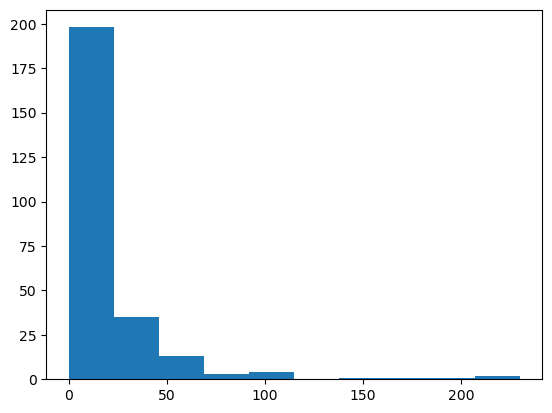

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bboxes_nums)

In [14]:
res = results[0]
boxes = res.boxes
boxes.xyxy.numpy().astype(int)

array([[ 334,  185,  610,  699],
       [   0,  153,  385,  700],
       [ 499,  114,  660,  500],
       [ 144,  635,  262,  718],
       [ 129,  605,  220,  717],
       [ 937,   93, 1118,  339],
       [ 651,  246,  999,  699]])

In [ ]:
res.plot()

In [35]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from scipy.stats import sem
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=2, n_repeats=5, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='precision_macro', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), sem(scores)))
scores

Accuracy: 0.861 (0.004)


array([    0.87155,     0.85545,     0.84388,     0.88015,     0.85851,       0.874,     0.87183,     0.83583,     0.86798,       0.855])

In [29]:
len(scores)

10

In [30]:
scores

array([      0.872,       0.856,       0.844,        0.88,       0.858,       0.874,       0.872,       0.836,       0.864,       0.854])

# Черновики

In [ ]:
import time
import numpy as np
from scipy import stats

dataset = np.random.randn(1000, 256)

#model = LDA()

times_measure_list = []
for X in dataset:
    t0 = time.time()
    res = model.predict(X)
    t1 = time.time()
    times_measure_list.append(t1-t0)

np.mean(times_measure_list)
stats.sem(times_measure_list)

In [1]:
import glob
import cv2


paths_to_all_videos = glob.glob(r'I:\AVABOS\new_projects2\*\cut\*.mp4')

frame_num_list = []
for path in paths_to_all_videos:
    cap = cv2.VideoCapture(path)
    frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    frame_num_list.append(frame_num)

sum(frame_num_list)

316179

In [7]:
from lxml import etree
import numpy as np

path_to_eafs_list = glob.glob(r'i:\AVABOS\разбиение на интервалы со стабильным положением тел\*\*.eaf')

persons_num_list = []
for path in path_to_eafs_list:
    tree = etree.parse(path)
    tiers_list = tree.xpath('TIER[not(contains(@TIER_ID, "НЕСТАБИЛЬНОЕ ВИДЕО"))]')
    persons_num_list.append(len(tiers_list))

np.mean(persons_num_list)

3.5166666666666666

In [10]:
lst = [3]
lst.sort()
lst

[3]